# Exemplo de separação regional residual utilizando um ajuste polinomial robusto (Beltrão et al., 1998)

* Beltrão, J. F., Silva, J. B. C., and Costa, J. C. Robust polynomial fitting method for regional gravity estimation
    GEOPHYSICS, 56(1), 80-89. [doi: 10.1190/1.1442960](http://dx.doi.org/10.1190/1.1442960)

Este código utiliza a biblioteca de modelagem e inversão de dados geofísicos denominada [Fatiando a Terra](http://www.fatiando.org/index.html).

### Coisas para importar

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from fatiando.vis import mpl
import pandas as pd
import matplotlib as mpb

### Importing Diorama TFA data

In [5]:
data = pd.read_csv('diorama_decimated_tfa_august.txt', skipinitialspace=True, delim_whitespace=True)

In [6]:
xp = data['X'].get_values()
yp = data['Y'].get_values()
#zp = - data['GPSALT'].get_values()
zp = np.zeros(xp.size) - 100.
dobs = data['MAGIGRF'].get_values()

### Pontos onde são calculados os dados

In [7]:
#shape = (100, 100) # número de pontos ao longo de x e y
N = xp.size # número de pontos
#area = (-5000, 5000, -5000, 5000) # x mínimo, x máximo, y mínimo e y máximo da área
#xp, yp, zp = gridder.regular(area, shape, z=-100) # grade regular localizada em z = -100 m

#xc = 0.5*(area[1] + area[0]) # coordenadas x do centro da área
#yc = 0.5*(area[3] + area[2]) # coordenadas y do centro da área

### Plot dos dados

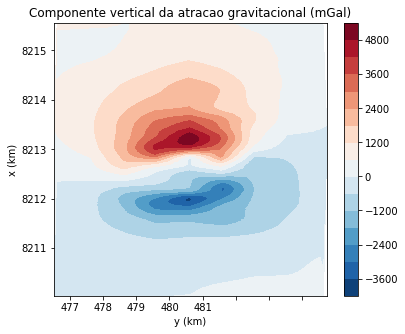

In [8]:
plt.figure(figsize=(6,5))

plt.subplot(1,1,1)
plt.title("Componente vertical da atracao gravitacional (mGal)")
#plt.axis('scaled')
plt.tricontourf(yp, xp, dobs, 15, cmap ='RdBu_r')
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

### Ajuste polinomial simples

In [9]:
A = np.vstack((np.ones(N), xp, yp)).T

In [10]:
p1 = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,dobs))

In [11]:
tfa_regional1 = np.dot(A,p1)

In [12]:
tfa_residual1 = dobs - tfa_regional1

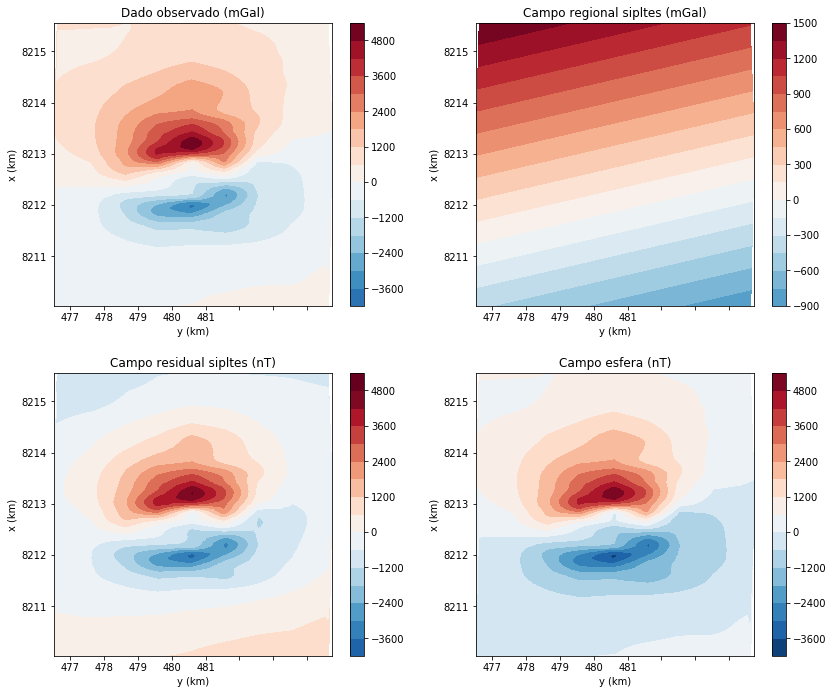

In [13]:
#plt.close('all')
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title("Dado observado (mGal)")
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
#plt.axis('scaled')
plt.tricontourf(yp, xp, dobs, 15, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,2)
plt.title("Campo regional sipltes (mGal)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=-np.max(tfa_regional1), vmax=np.max(tfa_regional1))
plt.tricontourf(yp, xp, tfa_regional1, 15, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,3)
plt.title("Campo residual sipltes (nT)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=-np.max(tfa_residual1), vmax=np.max(tfa_residual1))
plt.tricontourf(yp, xp, tfa_residual1, 15, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,4)
plt.title("Campo esfera (nT)")
#plt.axis('scaled')
plt.tricontourf(yp, xp, dobs, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

In [14]:
np.max(dobs)

5285.119000000001

In [15]:
np.max(tfa_residual1)

4821.212501735954

### Ajuste polinomial robusto

In [16]:
iteracoes = 30

p2 = p1.copy()
tfa_regional2 = tfa_regional1.copy()

for i in range(iteracoes):
    r = dobs - tfa_regional2
    s = np.median(r)
    #W = np.diag(np.exp(-((0.6745*r/s)**2.)))
    W = np.diag(1./np.abs(r + 1.e-10))
    W = np.dot(A.T,W)
    p2 = np.linalg.solve(np.dot(W,A), np.dot(W,dobs))
    tfa_regional2 = np.dot(A, p2)

In [17]:
tfa_residual2 = dobs - tfa_regional2

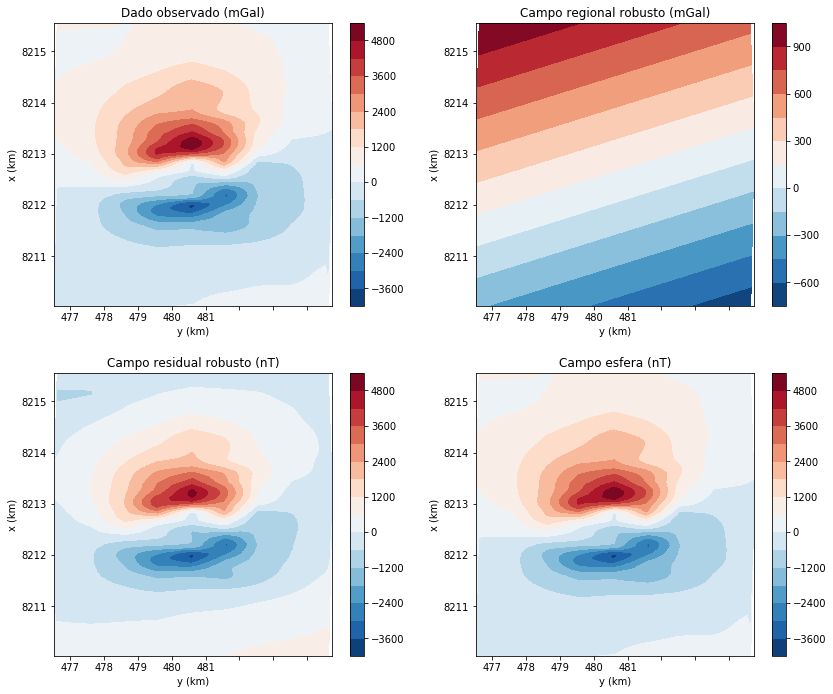

In [18]:
#plt.close('all')
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title("Dado observado (mGal)")
#plt.axis('scaled')
plt.tricontourf(yp, xp, dobs, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,2)
plt.title("Campo regional robusto (mGal)")
#plt.axis('scaled')
plt.tricontourf(yp, xp, tfa_regional2, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,3)
plt.title("Campo residual robusto (nT)")
#plt.axis('scaled')
plt.tricontourf(yp, xp, tfa_residual2, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,4)
plt.title("Campo esfera (nT)")
#plt.axis('scaled')
plt.tricontourf(yp, xp, dobs, 15, cmap = plt.get_cmap('RdBu_r'))
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

In [19]:
data.insert(5, "mag_res1", tfa_residual2)

In [20]:
data.to_csv('diorama_decimated_tfa_residual.txt', sep=' ')

In [21]:
maximo = np.max([np.max(gz_esfera), np.max(gz_residual1), np.max(gz_residual2)])

minimo = np.min([np.min(gz_esfera), np.min(gz_residual1), np.min(gz_residual2)])

mpl.close('all')
mpl.figure(figsize=(18,5))

mpl.subplot(1,3,1)
mpl.title("Campo da esfera (mGal)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gz_esfera, shape, 15, cmap = mpl.get_cmap('RdBu_r'),
            vmin=minimo, vmax=maximo)
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(1,3,2)
mpl.title("Campo residual simples (mGal)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gz_residual1, shape, 15, cmap = mpl.get_cmap('RdBu_r'),
            vmin=minimo, vmax=maximo)
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(1,3,3)
mpl.title("Campo residual robusto (mGal)")
mpl.axis('scaled')
mpl.contourf(yp, xp, gz_residual2, shape, 15, cmap = mpl.get_cmap('RdBu_r'),
            vmin=minimo, vmax=maximo)
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.tight_layout(pad = 2.)

mpl.show()

NameError: name 'gz_esfera' is not defined